# PPGEE0260: Modelagem e Simulação Discreta de Sistemas

Aluno: Carlos André de Mattos Teixeira

Código baseado em: https://github.com/williewheeler/stats-demos/blob/master/queueing/single-queue-sim.ipynb 


## Descrição
Objetivo: Adicionar dois novos eventos no simulador de fila M/M/1.

**Requisitos:**

1. Um programa executável e todos os arquivos necessários à sua execução;
2. Um relatório contendo toda a documentação do programa (variáveis, parâmetros, rotinas, fluxogramas das rotinas, etc.);
3. Um pequeno manual sobre como executar o programa e constando a modelagem do sistema.

**Método de Avaliação:**

O seu simulador será avaliado com base nos seguintes critérios e (pesos):

1. Funcionamento de acordo com o solicitado. Isto é, o modelo executado deve ter um comportamento (observável) semelhante ao descrito no escopo desta proposta
2. Implementação de funções aleatórias. Pelo menos as funções: Uniforme, Triangular, Normal e Exponencial. Além da alternativa de uso de um valor constante
3. Interface com o usuário (entrada de dados, visualização dos resultados)
4. Resultados dos experimentos
5. Documentação

## Set-up do Projeto

In [1]:
# Recarregar módulos automaticamente
%load_ext autoreload
%autoreload 2
   
from src.source import *
from src.settings import *

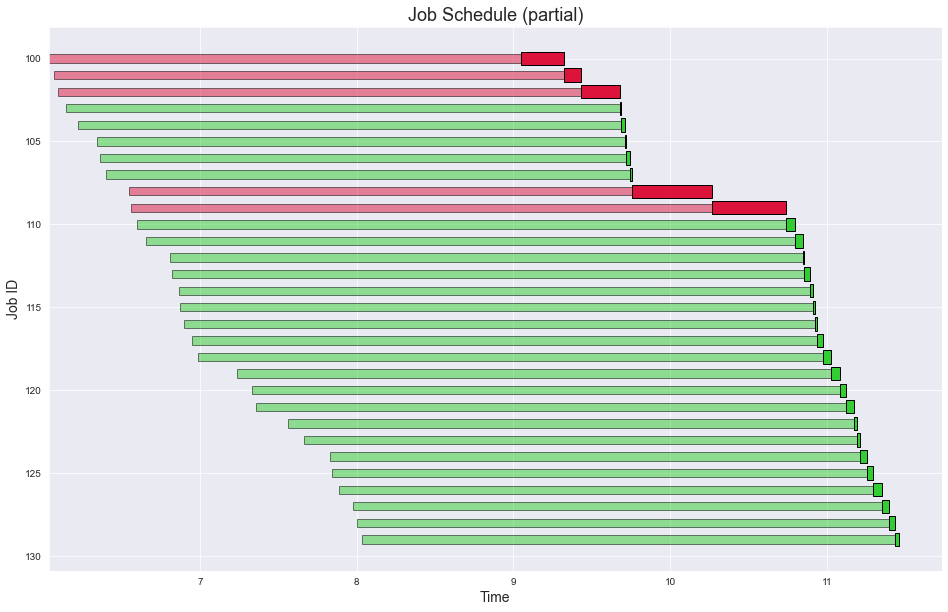

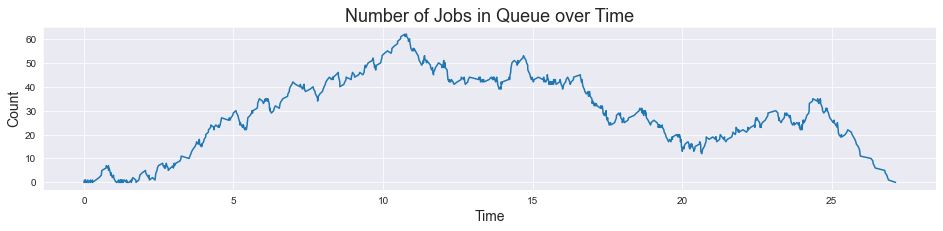

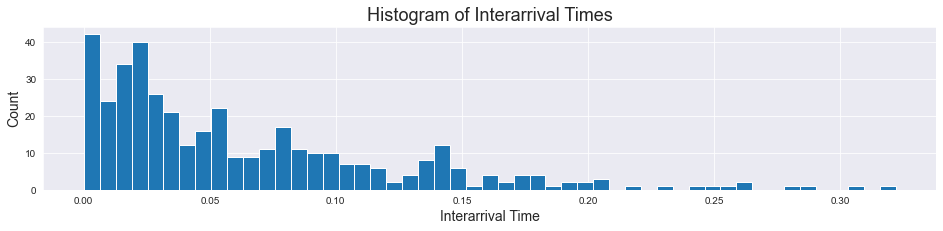

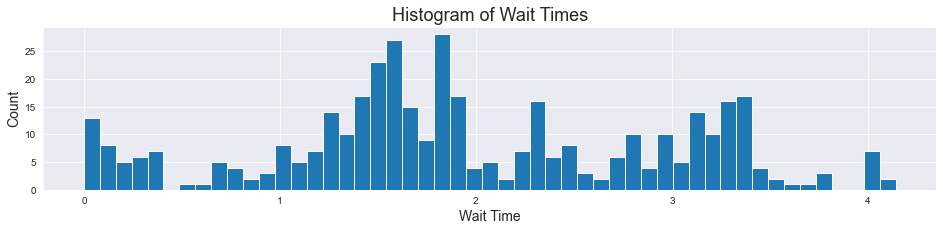

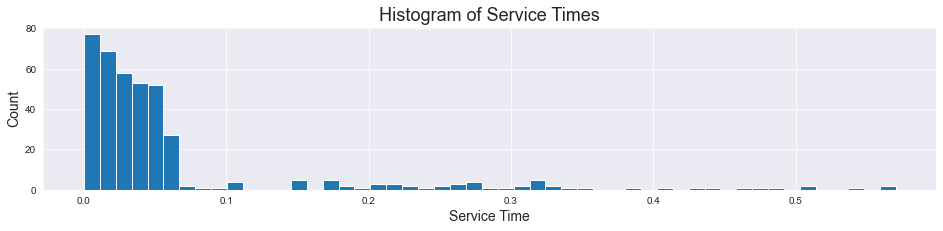

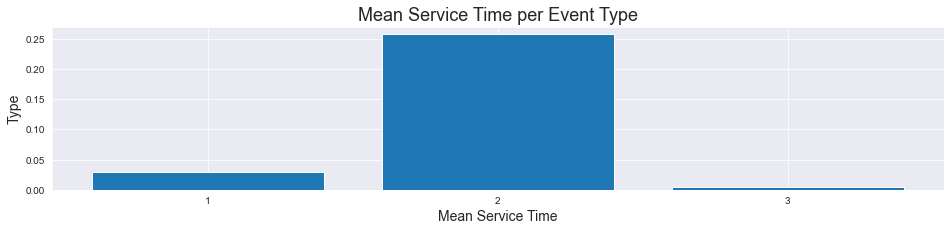

In [2]:
parameters['DISTRIBUTION'] = 'uniform'
results = run_sim_and_plot(parameters)